In [13]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# 1. EDA

In [14]:
df = pd.read_csv('data/FastagFraudDetection.csv')
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [15]:
#shape of data
df.shape

(5000, 13)

In [16]:
#information
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [17]:
# check the null values
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.describe()  #for numerical features

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [20]:
#descirbe or get the statictistcal description for numerical+categoriecal features
df.describe(include='object')

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/24/2023 2:55,Bus,FTG-459-WSX-543,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA37AB3456,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


#### Observation 1
1. Fastag ID has 549 Null values
2. No Duplicate Entries
3. Data types are almost correct

In [21]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [22]:
#unique values
print("Unique Vehicle Type: ", df['Vehicle_Type'].unique())
print("Unique TollBoothID : ", df['TollBoothID'].unique())
print("Unique Lane Type : ", df['Lane_Type'].unique())
print("Unique Vehicle Dimesnions : ", df['Vehicle_Dimensions'].unique())
print("Unique Fraud Indicator : ", df['Fraud_indicator'].unique())
print("Unique GeogrphicalLocation : ", df['Geographical_Location'].unique())

Unique Vehicle Type:  ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
Unique TollBoothID :  ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Unique Lane Type :  ['Express' 'Regular']
Unique Vehicle Dimesnions :  ['Large' 'Small' 'Medium']
Unique Fraud Indicator :  ['Fraud' 'Not Fraud']
Unique GeogrphicalLocation :  ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


# 2. Data Visualisation

In [23]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64


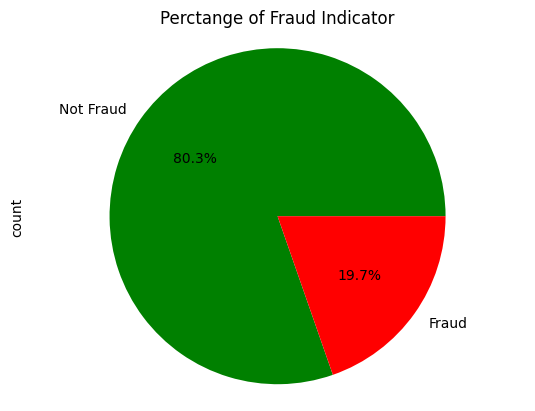

In [24]:
# percentage of fraud and not fraud
print(df['Fraud_indicator'].value_counts())
df['Fraud_indicator'].value_counts().plot(kind='pie',
                                         autopct = '%1.1f%%',
                                         colors = ['green', 'red'])
plt.title("Perctange of Fraud Indicator")
plt.axis('equal')
plt.show()

### 2.1 Analyse diffent Columns

Analysise based on Fruad indicator

In [25]:
df['Vehicle_Type'].value_counts()

Vehicle_Type
Bus           716
Car           714
Motorcycle    714
Truck         714
Van           714
Sedan         714
SUV           714
Name: count, dtype: int64

Text(0.5, 1.0, 'Vehicle Type')

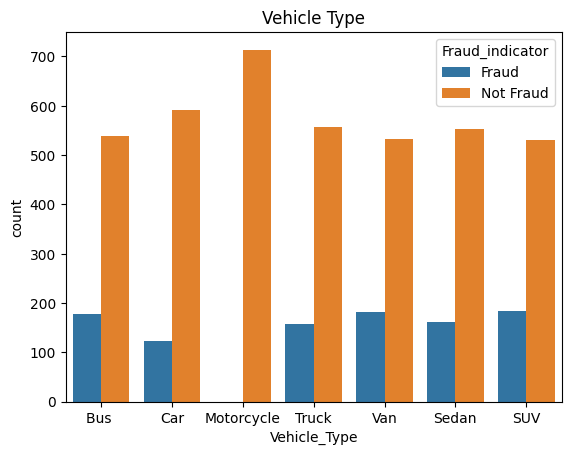

In [26]:
#Vheicle Typs
sns.countplot(x='Vehicle_Type',
              data = df,
              hue='Fraud_indicator').set_title('Vehicle Type')

Text(0.5, 1.0, 'Vehicle Dimensions')

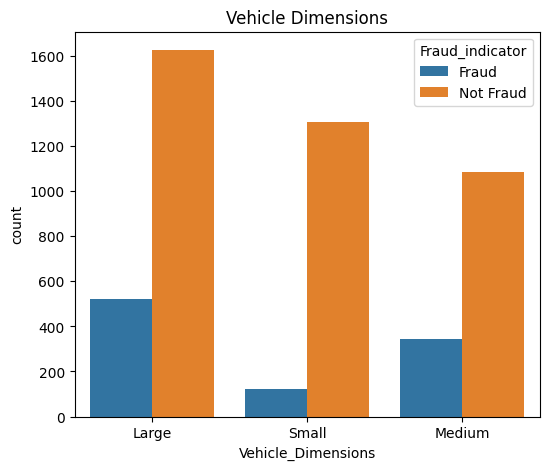

In [27]:
#Vheicle Dimensin
plt.figure(figsize=(6,5))
sns.countplot(x='Vehicle_Dimensions',
              data = df,
              hue='Fraud_indicator').set_title('Vehicle Dimensions')

Text(0.5, 1.0, 'Different Tollbooths')

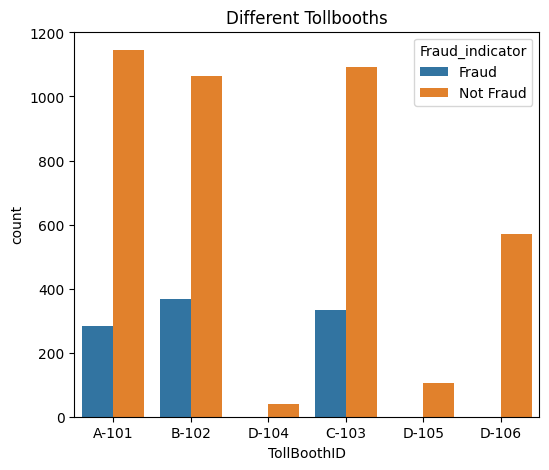

In [28]:
#Different toll booths
plt.figure(figsize=(6,5))
sns.countplot(x='TollBoothID',
              data = df,
              hue='Fraud_indicator').set_title('Different Tollbooths')

Text(0.5, 1.0, 'Different Lanes')

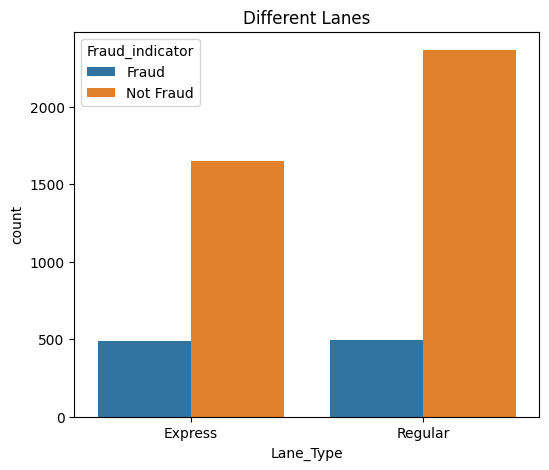

In [29]:
#Lane Type
plt.figure(figsize=(6,5))
sns.countplot(x='Lane_Type',
              data = df,
              hue='Fraud_indicator').set_title('Different Lanes')

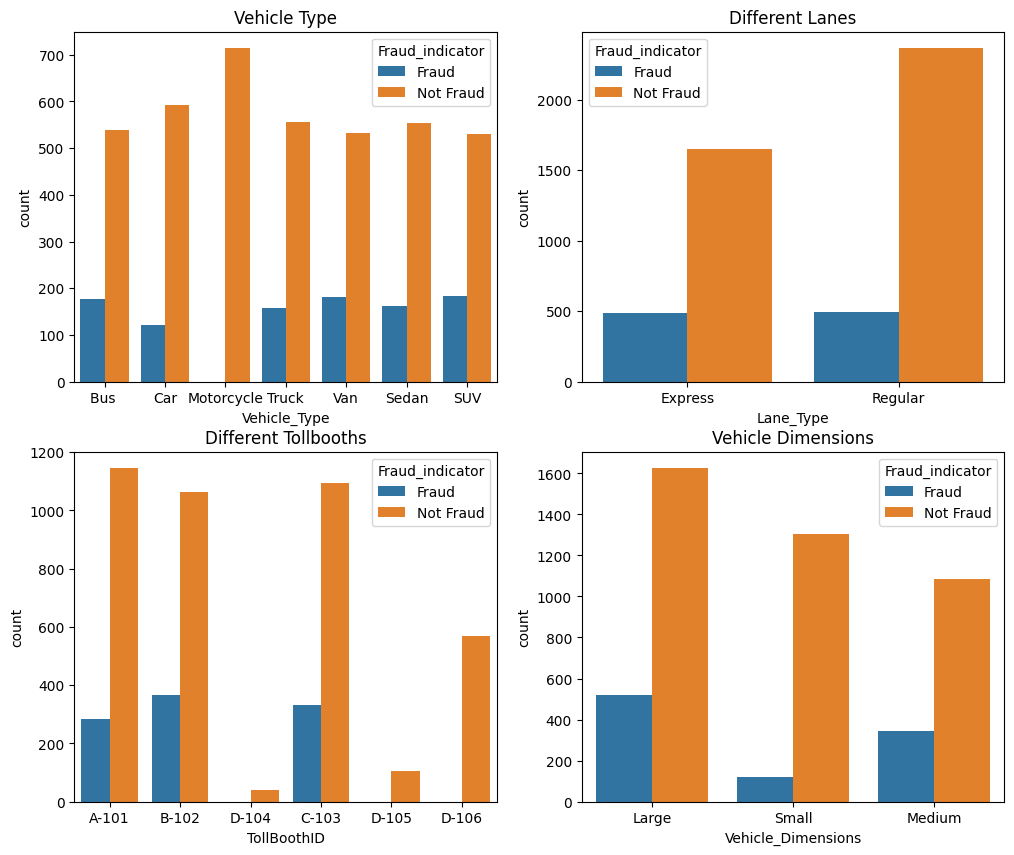

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [30]:
# comibing all graphs together 

fig, axes = plt.subplots(2,2, figsize=(12,10))
#Vheicle Typs
sns.countplot(x='Vehicle_Type',
              data = df,
              hue='Fraud_indicator',
             ax = axes[0,0]).set_title('Vehicle Type')
#Lane Type
plt.figure(figsize=(6,5))
sns.countplot(x='Lane_Type',
              data = df,
              hue='Fraud_indicator',
             ax = axes[0,1]).set_title('Different Lanes')
#Different toll booths
plt.figure(figsize=(6,5))
sns.countplot(x='TollBoothID',
              data = df,
              hue='Fraud_indicator',
             ax = axes[1,0]).set_title('Different Tollbooths')
#Vheicle Dimensin
plt.figure(figsize=(6,5))
sns.countplot(x='Vehicle_Dimensions',
              data = df,
              hue='Fraud_indicator',
             ax = axes[1,1]).set_title('Vehicle Dimensions')


plt.tight_layout()


#### Observation 2
1. Motorcycles are clan - not involved in any fraud
2. Tollbooths 104, 105 and 106 have no fraud detected. But 101,102,103 have mix data
3. Express way has higher fraud percentage based on vehicles than regular ways
4. very less small vehicles are involved in Faud
